In [4]:
from helper_functions import Auth, get_video, extract_frames, frame_generator

### Set ```USERNAME``` and ```API_KEY```

Use the ```Auth``` class to set you **username** and **api_key** in order to be able to access the Vantage API. 

In [5]:
Auth.USERNAME = ''
Auth.API_KEY = ''

### Search and download a Vivid-X2 video file

Using the Vantage platform find a video of interest and locate its filename. In the screenshot below, the video file is "VX020003b0".  

To download this file using the API, you can call the function ```get_video```.
Its syntax includes the filename (```'VX020003b0'```) and the ```aligned``` boolean argument that when set to ```True``` saves the video file after applying an aligning proccessing step. 

When ```aligned=True``` the output is a .mp4 file (8-bit RGB represenation). Otherwise, it's a compressed .zip file, containing both the original video (16-bit RGB representation) and various other files (geometries, frame coordinates, etc).

<img src="imgs/img_1_search_video.png?modified=123"> 

In [ ]:
get_video('VX020003b0', aligned=False)

In [1]:
# Unzip the compressed file
!unzip VX020003b0.zip

unzip:  cannot find or open VX020003b0.zip, VX020003b0.zip.zip or VX020003b0.zip.ZIP.


### Extract video frames

Use the ```extract_frames``` function to extract all individual frames. The function stores frames in ```out_folder``` (default='frames').

In [6]:
video_path = 'VX020003ad.mp4'
extract_frames(video_path, image_format='tif', out_folder='frames')

Bit Depth of the given video: 8
You have selected tif format
Extracting frames ...

Done. Extracted 33 frames.


### The ```frame_generator``` function

The ```frame_generator``` function yields a sinle frame each time, instead of handling a whole datacude with dimensions ```[h, w, num_frames]```, therefore reducing memory usage.  
The ```grayscale``` boolean argument when set to ```True``` yields 8-bit grayscale frames. 
The ```normalization``` boolean argument when set to ```True``` yields 8-bit RGB video frames. Otherwise uses the video original representation (e.g. 16-bit).

In [5]:
frame_gen = frame_generator('frames/', grayscale=False, normalization=False)

for frame in frame_gen:
    print(frame.shape)

(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)
(5120, 5120, 3)


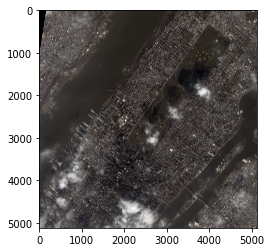

In [9]:
import cv2
import matplotlib.pyplot as plt

frame = cv2.imread('frames/VX020003ad_0000.tif')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame)